## KNN Scratch Implementation (Diamond Price Prediction)
### Comparing KNN from Scratch and KNN using ML Model.
### Data Description:
1.Title : Diamonds Dataset

2.the 7th column "price" is the values to be predicted.

3.Data Type : Mixed ( Numerical + Categorical)

4.Dataset has nearly 54000 instances.

5.It has 10 features.

6.Features

price : price in US dollars ($326--$18,823)

carat : weight of the diamond (0.2--5.01)

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color : diamond colour, from J (worst) to D (best)

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x : length in mm (0--10.74)

y : width in mm (0--58.9)

z : depth in mm (0--31.8)

depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table : width of top of diamond relative to widest point (43--95)

7.Caution : Handle Categorical data before building a model.

## Step - 1:
### Load Data

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
df = pd.read_csv(r"C:\Users\91739\Downloads\diamonds (1).csv")
# First 3 columns
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [3]:
# Shape of data
df.shape

(53940, 10)

In [4]:
# Renaming columns
df.rename(columns={'x':'length', 'y':'width', 'z':'depth', 'depth':'depth%'}, inplace = True)
# Creating Target column seperately to concat it at the end of the columns
df_target = df[['price']]
df_target.head(3)

,price
0,326
1,326
2,327


In [5]:
# Dropping the Target column
df = df.drop('price', axis = 1)
df.head(3)

,carat,cut,color,clarity,depth%,table,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31


In [6]:
# Concating Target column at the end of the columns
df = pd.concat([df, df_target], axis = 1)
df.head(3)

,carat,cut,color,clarity,depth%,table,length,width,depth,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327


In [7]:
# Shape of data
df.shape

(53940, 10)

## Step - 2:
## EDA

In [8]:
# Description of data
df.describe()

,carat,depth%,table,length,width,depth,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [9]:
# There are missing values assigned as 0 in columns
df[['length','width','depth']][(df['length']==0) | (df['width']==0) | (df['depth']==0)]

,length,width,depth
2207,6.55,6.48,0.0
2314,6.66,6.60,0.0
4791,6.50,6.47,0.0
5471,6.50,6.47,0.0
10167,7.15,7.04,0.0
11182,0.00,6.62,0.0
11963,0.00,0.00,0.0
13601,6.88,6.83,0.0
15951,0.00,0.00,0.0
24394,8.49,8.45,0.0


In [10]:
# Replacing 0 (missing values) with Null values (np.NaN).
df[['length','width','depth']] = df[['length','width','depth']].replace(0, np.NaN)

# Checking Null Values
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth%      0
table       0
length      8
width       7
depth      20
price       0
dtype: int64

In [11]:
# Dropping Null Values
df.dropna(inplace = True)

# Rechecking Null Values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth%     0
table      0
length     0
width      0
depth      0
price      0
dtype: int64

In [12]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth%   53920 non-null  float64
 5   table    53920 non-null  float64
 6   length   53920 non-null  float64
 7   width    53920 non-null  float64
 8   depth    53920 non-null  float64
 9   price    53920 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [13]:
# Shape of data
df.shape

(53920, 10)

#### Observation: 
There are no Null Values in our DataFrame.

### Univariate Analysis on Continous Variables:

<AxesSubplot:>

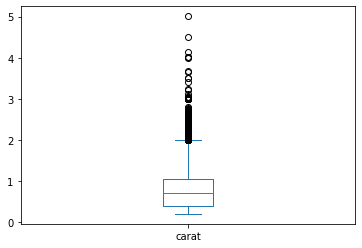

In [14]:
# Carat Column
df['carat'].plot.box()

<AxesSubplot:>

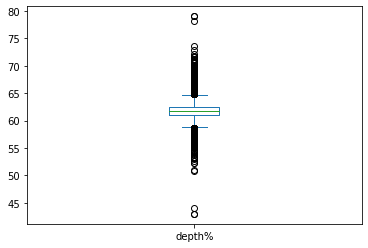

In [15]:
# Depth% Column
df['depth%'].plot.box()

<AxesSubplot:>

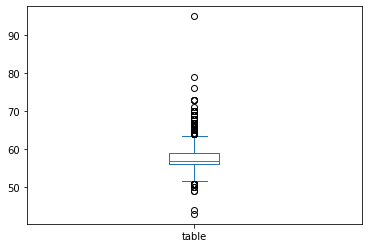

In [16]:
# Table Column
df['table'].plot.box()

<AxesSubplot:>

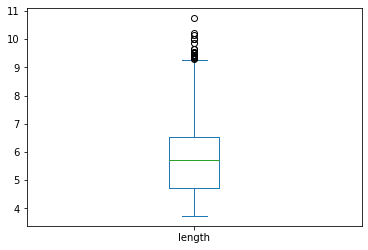

In [17]:
# Length Column
df['length'].plot.box()

<AxesSubplot:>

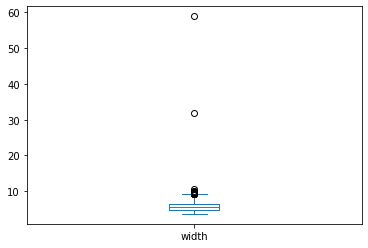

In [18]:
# Width Column
df['width'].plot.box()

<AxesSubplot:>

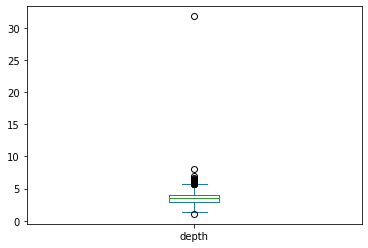

In [19]:
# Depth Column
df['depth'].plot.box()

<AxesSubplot:>

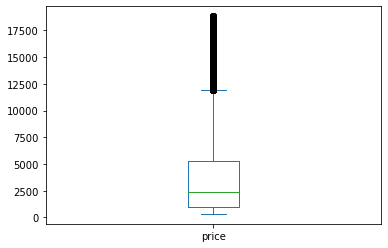

In [20]:
# Price Column
df['price'].plot.box()

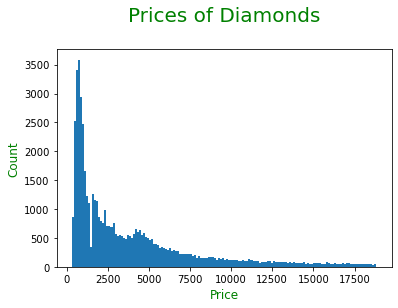

In [21]:
#Univarient analysis frequency plot for price of diamond

plt.hist(df['price'], bins = 150)
plt.title("Prices of Diamonds\n", fontdict={'fontsize': 20,'fontweight' : 20, 'color' : 'Green'})

plt.xlabel("Price", fontdict={'fontsize': 12,'color' : 'Green'})
plt.ylabel("Count", fontdict={'fontsize': 12,'color' : 'Green'})

plt.show()

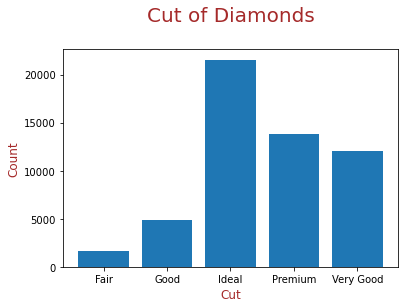

In [22]:
#variation on quality of cut

groupdata = df.groupby("cut").count()
groupdata

x = []
y = []
for i in [0, 1, 2, 3, 4]: 
    x.append(groupdata.index[i])
    y.append(groupdata.iloc[i,0])

plt.bar(x, y)

plt.title("Cut of Diamonds\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Brown'})

plt.xlabel("Cut", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

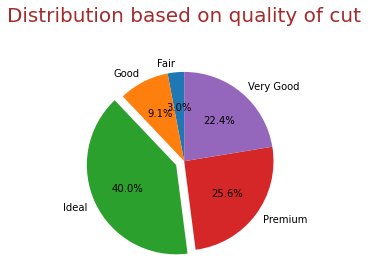

In [23]:
explode = (0, 0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'ideal')
plt.figure(figsize = [4,5])

plt.pie(y, explode=explode, labels=x, autopct='%1.1f%%', 
        textprops={'fontsize': 10, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Distribution based on quality of cut\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

### Univariate Analysis on Categorical Variable:

<AxesSubplot:>

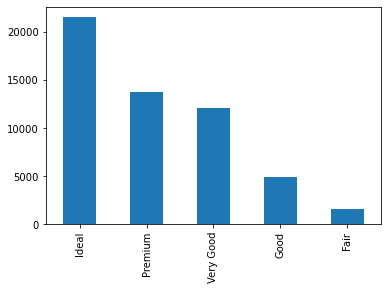

In [24]:
# BARPLOT for CUT
df['cut'].value_counts().plot.bar()

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

<AxesSubplot:>

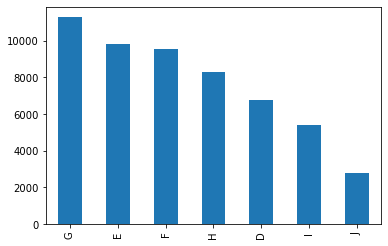

In [25]:
# BARPLOT for COLOR
df['color'].value_counts().plot.bar()

color : diamond colour, from J (worst) to D (best)

<AxesSubplot:>

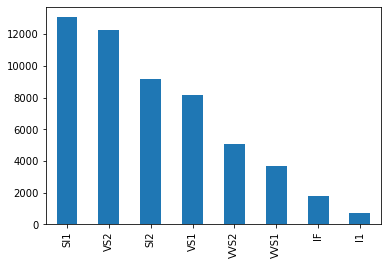

In [26]:
# BARPLOT for CLARITY
df['clarity'].value_counts().plot.bar()

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

### Bivariate Analysis on Numerical- Numerical Variables:

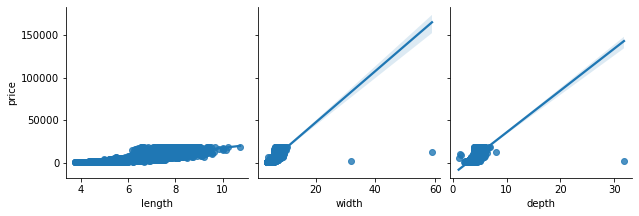

In [27]:
# Pairplot
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['length','width','depth'] , y_vars =  ['price'] , kind = 'reg')

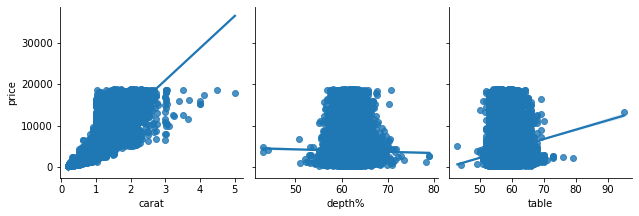

In [28]:
# Pairplot
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['carat','depth%', 'table'] , y_vars =  ['price'] , kind = 'reg')

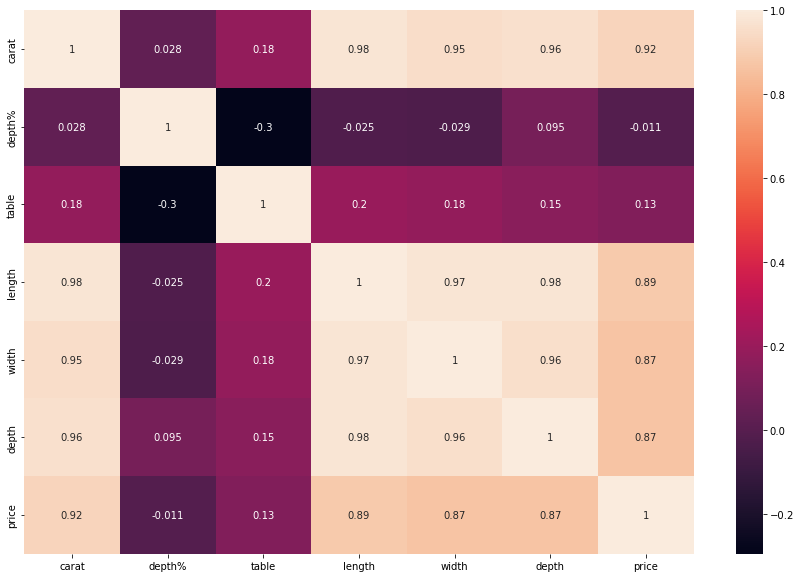

In [29]:
# Heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr , xticklabels=corr.columns , yticklabels=corr.columns , annot=True)

#### There is a high correlation between carat, length, width, depth and price.

### Bivariate Analysis on Categorical - Continous Variables:

<AxesSubplot:xlabel='cut'>

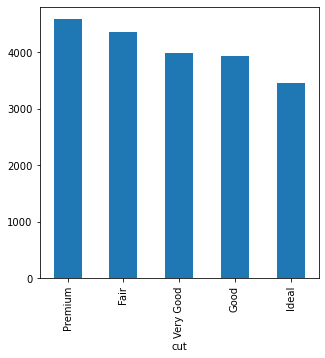

In [30]:
# BARPLOT for Cut and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('cut')['price'].mean().sort_values(ascending = False).plot.bar()

cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

<AxesSubplot:xlabel='color'>

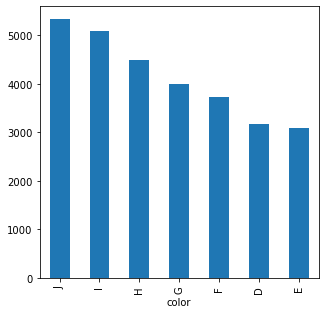

In [31]:
# BARPLOT for Color and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('color')['price'].mean().sort_values(ascending = False).plot.bar()

color : diamond colour, from J (worst) to D (best)

<AxesSubplot:xlabel='clarity'>

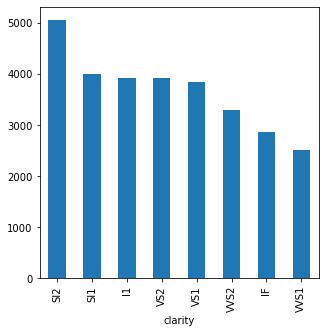

In [32]:
# BARPLOT for Clarity and Price
fig, ax = plt.subplots(figsize=(5,5))
df.groupby('clarity')['price'].mean().sort_values(ascending = False).plot.bar()

clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

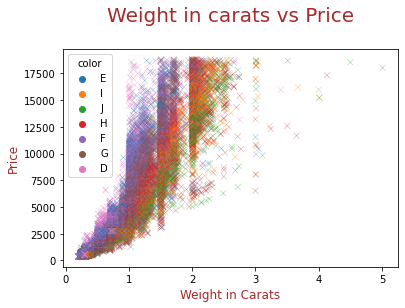

In [41]:
#Multipvarient analysis to show distribution among price respect to carat and color
ax =sns.scatterplot(x='carat',y='price', hue='color',alpha = 0.5, marker="x", data=df)

plt.title("Weight in carats vs Price\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Brown'})
plt.xlabel("Weight in Carats", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Price", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

[]

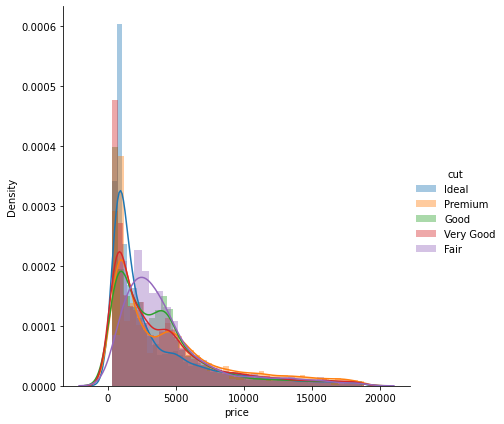

In [43]:
sns.FacetGrid(df, hue = 'cut', height = 6).map(sns.distplot, 'price').add_legend()
plt.plot()

### Splitting the Target and Independent Columns

In [33]:
X = df.drop('price', axis = 1)
y = df[['price']]
X.head()


,carat,cut,color,clarity,depth%,table,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [34]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


### Splitting Data into Train and Test

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (40440, 9) (40440, 1)
Test Set:  (13480, 9) (13480, 1)


### Label Encoding

In [36]:
# Importing LabelEncoder Module
from sklearn.preprocessing import LabelEncoder

X_train.head()

,carat,cut,color,clarity,depth%,table,length,width,depth
42571,0.38,Premium,E,VVS1,61.9,58.0,4.66,4.62,2.87
20932,1.51,Very Good,E,SI2,61.2,58.0,7.30,7.35,4.48
3488,0.90,Good,I,VS2,62.5,59.0,6.06,6.13,3.81
11868,1.16,Ideal,I,SI1,62.4,57.0,6.71,6.75,4.20
27500,2.07,Ideal,H,SI2,63.5,53.0,8.12,8.09,5.14


In [37]:
X_test.head()

,carat,cut,color,clarity,depth%,table,length,width,depth
10219,1.00,Ideal,E,SI2,61.8,57.0,6.39,6.43,3.96
22845,1.51,Good,E,SI2,58.9,61.0,7.54,7.50,4.43
43017,0.50,Ideal,H,VS1,61.9,54.0,5.12,5.15,3.18
35171,0.31,Ideal,G,IF,61.0,56.0,4.38,4.41,2.68
1456,0.80,Ideal,E,SI2,61.0,55.0,6.00,6.03,3.67


In [38]:
# label encoding the categorical columns
le= LabelEncoder()
X_train['cut']=le.fit_transform(X_train['cut'])
X_train['color']=le.fit_transform(X_train['color'])
X_train['clarity']=le.fit_transform(X_train['clarity'])

# label encoding the categorical columns
le= LabelEncoder()
X_test['cut']=le.fit_transform(X_test['cut'])
X_test['color']=le.fit_transform(X_test['color'])
X_test['clarity']=le.fit_transform(X_test['clarity'])

### Standardization

In [39]:
from sklearn import preprocessing
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test)

X_train_norm[0:1]

array([[-0.87891522,  0.43360811, -0.93871142,  1.24949381,  0.10230313,
         0.24592578, -0.95596765, -0.97466825, -0.94815031]])

In [40]:
X_test_norm[0:1]

array([[ 0.44096913, -0.53650903, -0.93177071, -0.47345284,  0.04350722,
        -0.20984386,  0.59590245,  0.61979885,  0.61663066]])

## KNN from Scratch

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [52]:
class KNearestNeighbors():
    def __init__(self,k):
        self.k = 1
        
    def train(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        distances = self.compute_distance(X_test)
        return self.predict_labels(distances)
    
    def compute_distance(self ,X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test,num_train))
    
        for i in range(num_test):
            for j in range(num_train):
                distances[i,j] = np.sqrt(np.sum((X_test[i,:] - self.X_train[j,:])**2))
        return distances
    
    def predict_labels(self,distances):
        num_test = distances.shape[0]
        y_pred = np.zeros(num_test)
        
        for i in range(num_test):
            y_indices = np.argsort(distances[i,:])
            k_closest_classes = self.y_train[y_indices[:self.k]].astype(int)
            y_pred[i] = np.argmax(np.bincount(k_closest_classes))
            
        return y_pred

## In main function implementing KNN from sklearn and checking accuracy of scratch and KNN

In [53]:
def main():
    
    df = pd.read_csv(r"C:\Users\91739\Downloads\diamonds (1).csv",nrows = 1000)
    
    label = LabelEncoder()
    
    df['cut'] = label.fit_transform(df['cut'].astype('str'))
    df['color'] = label.fit_transform(df['color'].astype('str'))
    df['clarity'] = label.fit_transform(df['clarity'].astype('str'))
    
    # Features
    X = df.drop('price',axis=1).values
    # Target Feature
    y = df['price'].values
    
    # Splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = None)
    
    # Scaling
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    # Fitting the Model
    KNN = KNearestNeighbors( k = 3 )
    KNN.train( X_train , y_train )
    
    # Prediction
    y_pred = KNN.predict(X_test)
    # Check Accuracy of Model
    print('Accuracy of the knn Scratch Model :',r2_score( y_test , y_pred ))
    
    # Fitting the Model by sklearn
    knn = KNeighborsRegressor( n_neighbors = 3 )
    knn.fit( X_train , y_train )
    y_pred_sklearn = knn.predict( X_test )
    
    # Check Accuracy of the sklearn Model
    print('Accuracy of the scikitlearn Model :',r2_score( y_test , y_pred_sklearn ))

In [54]:
if __name__ == '__main__' :
    main()

Accuracy of the knn Scratch Model : 0.9957208947096439
Accuracy of the scikitlearn Model : 0.9966885100241726


## Therefore, We got the same accuracy from both the knn models with scratch and scikit learn.

## Thank You, Task Completed